## Part 2

Part 2 ini memakan banyak waktu dan memori komputer, sehingga HATI-HATI. <br>
Perlu part 1 jika ingin menjalankan .ipynb ini

<br>
<b>Sebaiknya tidak perlu dijalankan ulang atau "Run All".</b>

<br>
Credits: <br>
<ul>
    <li>
        <a href="https://www.kaggle.com/code/laowingkin/netflix-movie-recommendation">https://www.kaggle.com/code/laowingkin/netflix-movie-recommendation</a>
    </li>
    <li>
        <a href="https://www.kaggle.com/code/ervinweeheshuo/netflix-movie-recommendation">https://www.kaggle.com/code/ervinweeheshuo/netflix-movie-recommendation</a>
    </li>
</ul>
<hr>

In [2]:
# Import Library needed

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pickle import dump, load
from time import perf_counter


In [2]:
# Load dataset
df = load(open("final_combined_data.pkl", "rb"))


### Data view

In [3]:
display(df.iloc[:4, :])
display(df.iloc[548: 552])
display(df.iloc[694:698])

,User ID,Rating,Movie ID
0,1488844,3.0,1
1,822109,5.0,1
2,885013,4.0,1
3,30878,4.0,1


,User ID,Rating,Movie ID
548,1666394,3.0,2
549,1759415,4.0,2
550,1959936,5.0,2
551,998862,4.0,2


,User ID,Rating,Movie ID
694,1331154,4.0,3
695,2632461,3.0,3
696,44937,5.0,3
697,656399,4.0,3


movie count   : 0
rating count  : 100480507
user count    : 480189
Time to execute: 6.247s


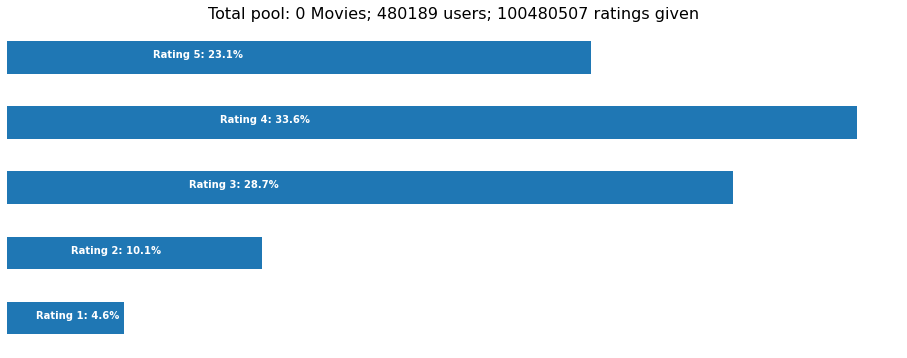

In [4]:
start = perf_counter()
p = df.groupby('Rating')['Rating'].agg(['count'])

# get movie count
movie_count = df.isnull().sum()[1]
# get user count
user_count = df['User ID'].nunique() - movie_count
# get rating count
rating_count = df['User ID'].count() - movie_count

ax = p.plot(kind='barh', legend=False, figsize=(16,6))
plt.title(f"Total pool: {movie_count} Movies; {user_count} users; {rating_count} ratings given", fontsize=16)
plt.axis('off')

for i in range(1,6):
    ax.text(
        p.iloc[i-1][0]/4, i-1, 
        f"Rating {i}: {p.iloc[i-1][0]*100 / p.sum()[0] :.1f}%", 
        color='white', 
        weight='bold'
    )

print("movie count   :", movie_count)
print("rating count  :", rating_count)
print("user count    :", user_count)
end = perf_counter()

times = end - start
print(f'Time to execute: {times:.3f}s')


In [5]:
df_movie_summary = df.groupby('Movie ID')['Rating'].agg(['count','mean'])
df_movie_summary.index = df_movie_summary.index.map(int)

display(df_movie_summary.sample(4))
print(df_movie_summary.shape)


,count,mean
Movie ID,,
2884,1672,3.145933
8132,203,2.556650
13412,45166,3.878116
1467,24089,3.710241


(17770, 2)


In [6]:
movie_benchmark = round(df_movie_summary['count'].quantile(0.7), 0)
movie_list = df_movie_summary[df_movie_summary['count'] > movie_benchmark].index
movie_list


Int64Index([    3,     8,    16,    17,    18,    26,    28,    30,    33,
               44,
            ...
            17741, 17743, 17751, 17756, 17758, 17761, 17762, 17763, 17764,
            17769],
           dtype='int64', name='Movie ID', length=5331)

In [7]:
df_user_summary = df.groupby('User ID')['Rating'].agg(['count','mean'])
display(df_user_summary.sample(4))
print(df_user_summary.shape)


,count,mean
User ID,,
2262694,56,3.500000
1032853,156,3.660256
1613405,110,3.172727
1910109,129,3.565891


(480189, 2)


In [8]:
user_benchmark = round(df_user_summary['count'].quantile(0.7),0)
user_benchmark


211.0

In [9]:
user_list = df_user_summary[df_user_summary['count'] > user_benchmark].index
user_list


Int64Index([      6,       7,      10,      79,      97,     116,     134,
                169,     188,     195,
            ...
            2649308, 2649328, 2649331, 2649335, 2649336, 2649370, 2649378,
            2649388, 2649426, 2649429],
           dtype='int64', name='User ID', length=143743)

In [10]:
#Slice df with user_list and movie_list
df = df[~df['Movie ID'].isin(movie_list)]
df = df[~df['User ID'].isin(user_list)]
df = df.reset_index(drop=True)


In [11]:
df

,User ID,Rating,Movie ID
0,822109,5.0,1
1,124105,4.0,1
2,1842128,4.0,1
3,2238063,3.0,1
4,1503895,4.0,1
...,...,...,...
1312982,1472413,1.0,17770
1312983,899014,2.0,17770
1312984,98445,4.0,17770
1312985,357707,3.0,17770


### Computing

NOTE: <br>
All cells below taking time & memory so much 

Estimated: <br>
3 hours running time, 8.2 Gb Disk usage, & full RAM consumed (my comp consumes full RAM - 16Gb)

<br>
<br>
<b>---------------- I suggest not to run it again! ----------------</b>

In [12]:
start = perf_counter()
df_p = pd.pivot_table(df.iloc[:df.shape[0]//2, :], values='Rating', index='User ID', columns='Movie ID')
end = perf_counter()

display(df_p)
print(f'Time execute: {end - start:.4f}s')

# My computer through an error if using full dataset, so just take it half


Movie ID,1,2,4,5,6,7,9,10,11,12,...,8871,8873,8874,8875,8876,8878,8879,8882,8885,8886
User ID,,,,,,,,,,,,,,,,,,,,,
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2649323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2649337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Time execute: 56.5685s


In [13]:
df_title = pd.read_csv('movie_titles.csv', encoding="ISO-8859-1", names=['Movie_Id', 'Year', 'Name'], usecols=[0, 1, 2])
df_title.set_index('Movie_Id', inplace=True)

display(df_title)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [14]:
# surprise library is used for building recommendation systems
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate


reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(df[['Cust-Id', 'Movie Id', 'Ratings']][:100000], reader)
svd = SVD()

cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)


ModuleNotFoundError: No module named 'surprise'

Code di atas memang Error

Saya sudah mencoba berbagai cara untuk menginstall modul surprise ke python saya, tetap tidak bisa. Sekalipun menggunakan Anaconda, tetap tidak bisa.

In [15]:
df_count = df_p.count(axis='columns')
df_count.sort_values(ascending=False) # customer 2446318 has the most ratings

User ID
1768970    98
334857     92
2446318    91
1471876    84
1763459    83
           ..
599932      1
1707871     1
1707845     1
1707842     1
25          1
Length: 169298, dtype: int64

In [16]:
#To Establish the movies customer 2446318 
df_2446318 = df[(df['User ID'] == 2446318) & (df['Rating']==5)]
df_2446318 = df_2446318.set_index('Movie ID')
df_2446318 = df_2446318.join(df_title)
df_2446318

,User ID,Rating,Year,Name
Movie ID,,,,
2466,2446318,5.0,1991.0,Detonator Orgun
2575,2446318,5.0,2004.0,R.O.D. the TV Series
2692,2446318,5.0,2000.0,Love Hina
4348,2446318,5.0,2002.0,The Twelve Kingdoms
6015,2446318,5.0,2003.0,DNAngel
6814,2446318,5.0,2003.0,Last Exile
7505,2446318,5.0,1995.0,Fushigi Yugi: The Mysterious Play
8228,2446318,5.0,2003.0,Please Twins
9141,2446318,5.0,2002.0,Full Metal Panic!


In [17]:
user_785314 = df_title.copy()
user_785314 = user_785314.reset_index()
user_785314 = user_785314[~user_785314['Movie_Id'].isin(movie_list)]
user_785314


,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
...,...,...,...
17764,17765,1969.0,Godzilla's Revenge
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch


In [18]:
data = Dataset.load_from_df(df[['User ID', 'Movie ID', 'Rating']], reader)
trainset = data.build_full_trainset()
svd.fit(trainset)


NameError: name 'Dataset' is not defined

Code di atas juga Error

In [6]:
# This take 187 minutes in my computer (if using full dataset df_p), so BE CAREFUL!!

start = perf_counter()
df_p = df_p.fillna(df_p.mean(axis=0))
# This take 8.2 GB memory
dump(df_p, open("rating_matrix.pkl", "wb"))
end = perf_counter()

display(df_p)
print(f'Time to execute: {end - start:.4f}s')


Movie ID,1,2,4,5,6,7,9,10,11,12,...,8871,8873,8874,8875,8876,8878,8879,8882,8885,8886
User ID,,,,,,,,,,,,,,,,,,,,,
25,4.125,4.0,2.5,4.269231,3.15,4.0,2.0,3.0,3.0,3.0,...,2.6,3.75,NaN,2.5,NaN,3.5,3.333333,NaN,4.1,4.0
33,4.125,4.0,2.5,4.269231,3.15,4.0,2.0,3.0,3.0,3.0,...,2.6,3.75,NaN,2.5,NaN,3.5,3.333333,NaN,4.1,4.0
42,4.125,4.0,2.5,4.269231,3.15,4.0,2.0,3.0,3.0,3.0,...,2.6,3.75,NaN,2.5,NaN,3.5,3.333333,NaN,4.1,4.0
59,4.125,4.0,2.5,4.269231,3.15,4.0,2.0,3.0,3.0,3.0,...,2.6,3.75,NaN,2.5,NaN,3.5,3.333333,NaN,4.1,4.0
83,4.125,4.0,2.5,4.269231,3.15,4.0,2.0,3.0,3.0,3.0,...,2.6,3.75,NaN,2.5,NaN,3.5,3.333333,NaN,4.1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649311,4.125,4.0,2.5,4.269231,3.15,4.0,2.0,3.0,3.0,3.0,...,2.6,3.75,NaN,2.5,NaN,3.5,3.333333,NaN,4.1,4.0
2649323,4.125,4.0,2.5,4.269231,3.15,4.0,2.0,3.0,3.0,3.0,...,2.6,3.75,NaN,2.5,NaN,3.5,3.333333,NaN,4.1,4.0
2649337,4.125,4.0,2.5,4.269231,3.15,4.0,2.0,3.0,3.0,3.0,...,2.6,3.75,NaN,2.5,NaN,3.5,3.333333,NaN,4.1,4.0


Time to execute: 9656.8279s


In [7]:
scaler = StandardScaler()
ratings_matrix_scaled = scaler.fit_transform(df_p)


In [8]:
ratings_matrix_scaled


array([[ 0.00493856,  0.00259591, -0.00675475, ...,         nan,
        -0.00053713, -0.00014396],
       [ 0.00493856,  0.00259591, -0.00675475, ...,         nan,
        -0.00053713, -0.00014396],
       [ 0.00493856,  0.00259591, -0.00675475, ...,         nan,
        -0.00053713, -0.00014396],
       ...,
       [ 0.00493856,  0.00259591, -0.00675475, ...,         nan,
        -0.00053713, -0.00014396],
       [ 0.00493856,  0.00259591, -0.00675475, ...,         nan,
        -0.00053713, -0.00014396],
       [ 0.00493856,  0.00259591, -0.00675475, ...,         nan,
        -0.00053713, -0.00014396]])

In [59]:
# Perform Matrix Factorization
start = perf_counter()
A = df_p.iloc[:37, :37].to_numpy()
U, S, V = np.linalg.svd(A)
end = perf_counter()

print(f'Time to execute: {end - start:.4f}s')


Time to execute: 0.0010s


df_p.iloc[:37, :37] because if more dataset, I got an error like this:

LinAlgError: SVD did not converge


In [55]:
# Displaying Matrix Factorizationed
display(U)
print(U.shape)
display(S)
print(S.shape)
display(V)
print(V.shape)


array([[-1.64398987e-01, -1.95869955e-02, -5.55111512e-16, ...,
        -5.45732341e-18, -2.91962053e-18,  9.86199433e-01],
       [-1.64398987e-01, -6.63776631e-02,  9.82654966e-01, ...,
         4.23709260e-18,  3.57614148e-18, -2.87235675e-02],
       [-1.64398987e-01, -6.63776631e-02, -4.93734010e-02, ...,
         3.33537798e-18,  3.49745579e-18, -2.87235675e-02],
       ...,
       [-1.64398987e-01,  4.15458910e-01, -9.37418371e-03, ...,
        -2.47533302e-18, -1.73287899e-18, -1.91537681e-02],
       [-1.64398987e-01,  4.15458910e-01, -9.37418371e-03, ...,
         1.59663586e-18,  7.83746134e-19, -1.91537681e-02],
       [-1.64398987e-01,  4.15458910e-01, -9.37418371e-03, ...,
        -5.62216069e-18, -2.08652147e-18, -1.91537681e-02]])

(37, 37)


array([1.34426032e+02, 1.31957990e-14, 1.31957990e-14, 1.31957990e-14,
       1.31957990e-14, 1.31957990e-14, 1.31957990e-14, 1.31957990e-14,
       1.31957990e-14, 1.31957990e-14, 1.31957990e-14, 1.31957990e-14,
       1.31957990e-14, 1.31957990e-14, 1.31957990e-14, 1.31957990e-14,
       1.31957990e-14, 1.31957990e-14, 1.31957990e-14, 1.31957990e-14,
       1.31957990e-14, 1.31957990e-14, 1.31957990e-14, 1.31957990e-14,
       1.31957990e-14, 1.31957990e-14, 1.31957990e-14, 1.31957990e-14,
       1.31957990e-14, 1.31957990e-14, 1.31957990e-14, 1.31957990e-14,
       1.31957990e-14, 1.31957990e-14, 1.31957990e-14, 1.31957990e-14,
       9.43003603e-15])

(37,)


array([[-1.86655777e-01, -1.80999541e-01, -1.13124713e-01, ...,
        -2.26249426e-01, -1.13124713e-01, -1.99099495e-01],
       [ 0.00000000e+00, -5.98439452e-02, -4.90673740e-02, ...,
        -9.81347479e-02, -4.90673740e-02, -1.28043551e-02],
       [ 0.00000000e+00,  1.85848162e-01, -1.62411971e-01, ...,
        -3.24823942e-01, -1.62411971e-01,  1.40612587e-01],
       ...,
       [ 0.00000000e+00,  4.03789390e-05,  1.34468967e-05, ...,
         5.29600266e-06,  2.85777444e-05, -6.74693416e-06],
       [ 0.00000000e+00,  3.05726593e-17,  1.01499275e-17, ...,
         3.88415533e-18,  2.15707346e-17, -4.20414150e-18],
       [-9.82425377e-01,  3.43889834e-02,  2.14931146e-02, ...,
         4.29862292e-02,  2.14931146e-02,  3.78278817e-02]])

(37, 37)


In [56]:
# Reconstruct matrix
A_reconstructed = U @ np.diag(S) @ V
display(A_reconstructed)
print(A_reconstructed.shape)

array([[4.125, 4.   , 2.5  , ..., 5.   , 2.5  , 4.4  ],
       [4.125, 4.   , 2.5  , ..., 5.   , 2.5  , 4.4  ],
       [4.125, 4.   , 2.5  , ..., 5.   , 2.5  , 4.4  ],
       ...,
       [4.125, 4.   , 2.5  , ..., 5.   , 2.5  , 4.4  ],
       [4.125, 4.   , 2.5  , ..., 5.   , 2.5  , 4.4  ],
       [4.125, 4.   , 2.5  , ..., 5.   , 2.5  , 4.4  ]])

(37, 37)
